# Baseline and Grid Search

In [0]:
### RUN TO IGNORE DEPRECATION WARNINGS ###
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [0]:
# import packages
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline

# Loading dataset
iris = datasets.load_iris()
features = iris.data
target = iris.target

# Create model
logistic = linear_model.LogisticRegression()
logistic

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
# baseline logistic model
logistic.fit(features, target)
print(logistic.score(features, target))

0.96


In [0]:
# Create range of candidate penalty hyperparameter values
penalty = ['l1', 'l2']

# Create range of candidate regularization hyperparameter values C
### Choose 10 values, between 0 and 4
C = np.logspace(0, 4, 10)

# Create dictionary hyperparameter candidates
hyperparameters = dict(C=C, penalty=penalty) 
print(hyperparameters)

{'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]), 'penalty': ['l1', 'l2']}


In [0]:
# Create grid search, and pass in all defined values
gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, verbose=1) # Fit grid search
best_model = gridsearch.fit(features, target)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


In [0]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty']) 
print('Best C:', best_model.best_estimator_.get_params()['C'])
print("The mean accuracy of the model is:",best_model.score(features, target))

Best Penalty: l1
Best C: 7.742636826811269
The mean accuracy of the model is: 0.98


# Pipeline on Multipe Algorithms

In [0]:
# Load data
iris = datasets.load_iris()
features = iris.data
target = iris.target

In [0]:
# Create a pipeline
pipe = Pipeline([("classifier", LogisticRegression())])

# Create dictionary with candidate learning algorithms and their hyperparameters
search_space = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}]

In [0]:
# Create grid search
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(features, target)

In [0]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(features, target))

Pipeline(memory=None,
         steps=[('classifier',
                 LogisticRegression(C=7.742636826811269, class_weight=None,
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=100, multi_class='warn',
                                    n_jobs=None, penalty='l1',
                                    random_state=None, solver='warn',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)
The mean accuracy of the model is: 0.98


# Predefined Functions

In [0]:
# # # Hyperparameter tuning and model selection
import numpy as np
from sklearn import linear_model
from sklearn import datasets
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

def perform_gridsearch_log(features, labels,
                       log_params = {'penalty': ['l1', 'l2'], 'C': np.logspace(0, 4, 10)},
                       cv=5, verbose = 1):
  import numpy as np
  from sklearn import linear_model, datasets
  from sklearn.model_selection import GridSearchCV
  
  global best_model
  logistic = linear_model.LogisticRegression()
  penalty = log_params['penalty']
  C = log_params['C']
  hyperparameters = dict(C=C, penalty=penalty) 

  gridsearch = GridSearchCV(logistic, hyperparameters, cv=cv, verbose=verbose) # Fit grid search
  best_model = gridsearch.fit(features, target)
  
  print(best_model.best_estimator_)
  print("The mean accuracy of the model is:",best_model.score(features, labels))

def rand_forest_rand_grid(features, labels, n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
                                           max_features = ['auto', 'sqrt'],
                                           max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
                                           min_samples_split = [2, 5, 10],
                                           min_samples_leaf = [1, 2, 4], bootstrap = [True, False]):
  
  max_depth.append(None)
  global best_model
 
  random_grid = {'n_estimators': n_estimators,
                 'max_features': max_features,
                 'max_depth': max_depth,
                 'min_samples_split': min_samples_split,
                 'min_samples_leaf': min_samples_leaf,
                 'bootstrap': bootstrap}
  
  rf = RandomForestRegressor()
  
  rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=1, random_state=42, n_jobs = -1)
  
  best_model = rf_random.fit(features, labels)
  print(best_model.best_estimator_)
  print("The mean accuracy of the model is:",best_model.score(features, labels))


def rand_forest_grid_search(features, labels, n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
                                           max_features = ['auto', 'sqrt'],
                                           max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],
                                           min_samples_split = [2, 5, 10],
                                           min_samples_leaf = [1, 2, 4], bootstrap = [True, False]):
  param_grid = {'n_estimators': n_estimators,
                 'max_features': max_features,
                 'max_depth': max_depth,
                 'min_samples_split': min_samples_split,
                 'min_samples_leaf': min_samples_leaf,
                 'bootstrap': bootstrap}
  
  global best_model
  rf = RandomForestRegressor()
  
  grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 1)

  best_model = grid_search.fit(train_features, train_labels)
  print(best_model.best_estimator_)
  print("The mean accuracy of the model is:",best_model.score(features, labels))

def execute_pipeline(features,labels, search_space=[
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}], cv=5, verbose=0, n_jobs=-1):

  global best_model
  
  pipe = Pipeline([("classifier", RandomForestClassifier())])
  
  gridsearch = GridSearchCV(pipe, search_space, cv=cv, verbose=verbose,n_jobs=n_jobs) # Fit grid search
  best_model = gridsearch.fit(features, labels)
  print(best_model.best_estimator_)
  print("The mean accuracy of the model is:",best_model.score(features, labels))

# Visualizations

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
from sklearn.ensemble import RandomForestClassifier 
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
# Load data
digits = load_digits()
# Create feature matrix and target vector
features, target = digits.data, digits.target
print("The shape of the features is:",features.shape)

The shape of the features is: (1797, 64)


In [0]:
# Create CV training and test scores for various training set sizes 
train_sizes, train_scores, test_scores = learning_curve(# Classifier
        RandomForestClassifier(), # Feature matrix features,
        y=target,
        X = features,
        # Number of folds 
        cv=10,
        # Performance metric 
        scoring='accuracy',
# Use all computer cores 
        n_jobs=-1,
# Sizes of 50training set
train_sizes=np.linspace(0.01,1.0,50))
print(len(train_sizes))

50


In [0]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

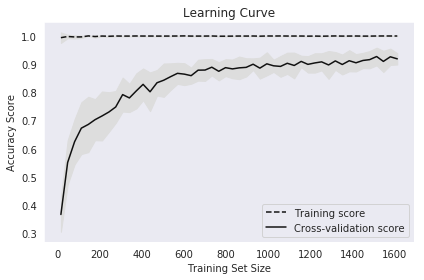

In [0]:
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
# Draw bands
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Visualizing the Effect of Change in Hyperparameters

In [0]:
 # Load libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import validation_curve
# Load data
digits = load_digits()
# Create feature matrix and target vector
features, target = digits.data, digits.target # Create range of values for parameter


In [0]:
param_range = np.arange(1, 250, 2)
print(param_range)
# Calculate accuracy on training and test set using range of parameter values

train_scores, test_scores = validation_curve( # Classifier
                            RandomForestClassifier(), 
                            # Feature matrix features,
                            X=features,
                            # Target vector
                            y=target,
                            # Hyperparameter to examine 
                            param_name="n_estimators",
                            # Range of hyperparameter's values 
                            param_range=param_range,
                            # Number of folds
                            cv=3,
                            # Performance metric scoring="accuracy",
                            # Use all computer cores 
                            n_jobs=-1)


[  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35
  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71
  73  75  77  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107
 109 111 113 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143
 145 147 149 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179
 181 183 185 187 189 191 193 195 197 199 201 203 205 207 209 211 213 215
 217 219 221 223 225 227 229 231 233 235 237 239 241 243 245 247 249]


In [0]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

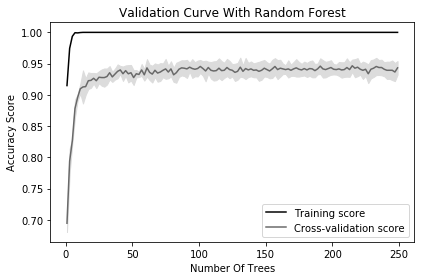

In [0]:
# Plot mean accuracy scores for training and test sets
# # # #
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")
# # # # 
# Plot accurancy bands for training and test sets
plt.fill_between(param_range, test_mean - test_std,
                 test_mean + test_std, color="gainsboro")
# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

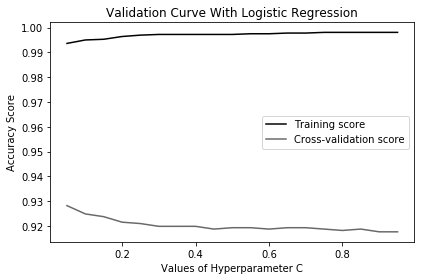

In [0]:
 # Load libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import validation_curve
# Load data
digits = load_digits()
# Create feature matrix and target vector
features, target = digits.data, digits.target # Create range of values for parameter
param_range = np.arange(.05, 1, 0.05)
# Calculate accuracy on training and test set using range of parameter values

train_scores, test_scores = validation_curve( # Classifier
                            LogisticRegression(), 
                            # Feature matrix features,
                            X=features,
                            # Target vector
                            y=target,
                            # Hyperparameter to examine 
                            param_name="C",
                            # Range of hyperparameter's values 
                            param_range=param_range,
                            # Number of folds
                            cv=3,
                            # Performance metric scoring="accuracy",
                            # Use all computer cores 
                            n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot mean accuracy scores for training and test sets
# # # #
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")
# # # # 

# Create plot
plt.title("Validation Curve With Logistic Regression")
plt.xlabel("Values of Hyperparameter C")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [0]:
"C= np.logspace(0, 100, 20)
print(C)

[1.00000000e+000 1.83298071e+005 3.35981829e+010 6.15848211e+015
 1.12883789e+021 2.06913808e+026 3.79269019e+031 6.95192796e+036
 1.27427499e+042 2.33572147e+047 4.28133240e+052 7.84759970e+057
 1.43844989e+063 2.63665090e+068 4.83293024e+073 8.85866790e+078
 1.62377674e+084 2.97635144e+089 5.45559478e+094 1.00000000e+100]


In [0]:
param_range = np.arange(1, 250, 2)
print(param_range)

[  1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35
  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71
  73  75  77  79  81  83  85  87  89  91  93  95  97  99 101 103 105 107
 109 111 113 115 117 119 121 123 125 127 129 131 133 135 137 139 141 143
 145 147 149 151 153 155 157 159 161 163 165 167 169 171 173 175 177 179
 181 183 185 187 189 191 193 195 197 199 201 203 205 207 209 211 213 215
 217 219 221 223 225 227 229 231 233 235 237 239 241 243 245 247 249]
